# Customer Churn Analysis

## Objective

### Understand why customers churn and what features influence churn using Exploratory Data Analysis (EDA).

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv(r'C:\Users\User\Desktop\New folder\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Data Overview

### Let's take a look at the structure, data types, and summary statistics of the dataset.

In [8]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning 

#### Replacing blanks with 0 as tenure is 0 and no TotalCharges are recorded and also change data type of TotalCharges .

In [13]:
data['TotalCharges']=data["TotalCharges"].replace(" ","0")
data['TotalCharges']=data["TotalCharges"].astype('float')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Coverting SeniorCitizen  to Categorical Values

#### Convereted 0 and 1 values of SeniorCitizen into yes/no for better understanding .

In [19]:
def conv(value):
    if value==0:
        return "No"
    else:
        return "Yes"

data['SeniorCitizen']=data['SeniorCitizen'].apply(conv)

In [20]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Univariate Anlaysis

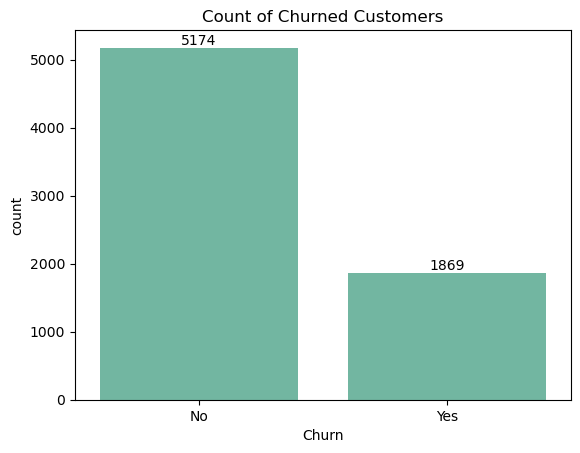

In [22]:
ax=sns.countplot(x="Churn",data=data,color="#66c2a5")
ax.bar_label(ax.containers[0])
plt.title('Count of Churned Customers')
plt.show()

### Churn Rate Distribution

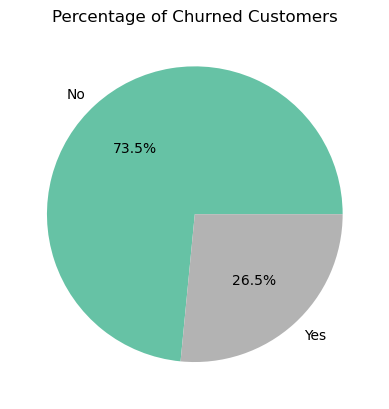

In [24]:
colors=["#66c2a5",'#b3b3b3']
plt.pie(data["Churn"].value_counts(),
labels=data["Churn"].value_counts().index,
autopct='%1.1f%%',colors=colors)
plt.title('Percentage of Churned Customers')
plt.show()

#### # From the given pie chart we can conclude that 26.5% of our customers have Churned out .

#### # Now find a reason behind it 

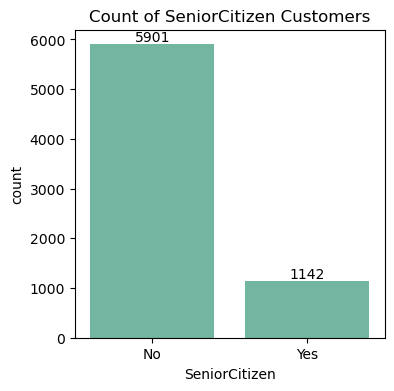

In [27]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x='SeniorCitizen', data=data, color="#66c2a5")
ax.bar_label(ax.containers[0])  
plt.title("Count of SeniorCitizen Customers")
plt.show()

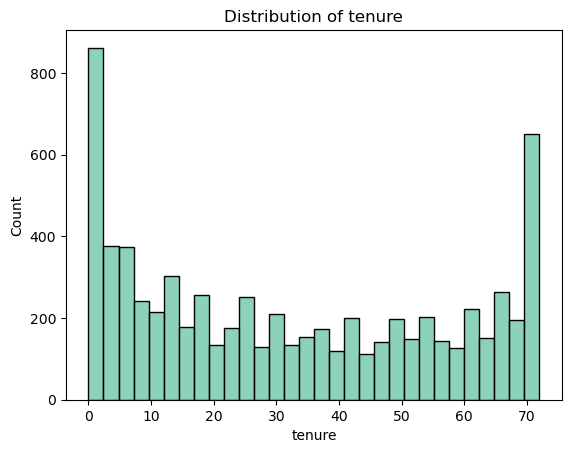

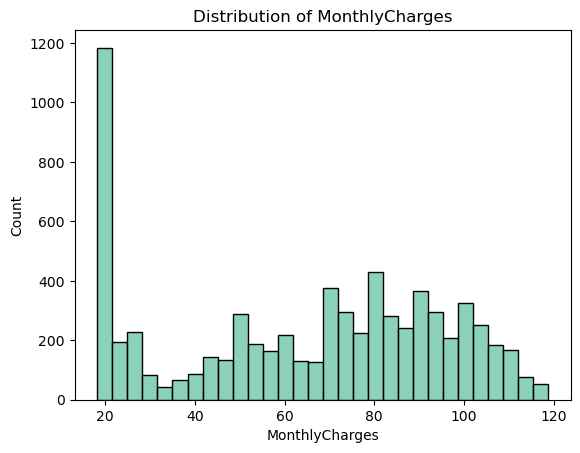

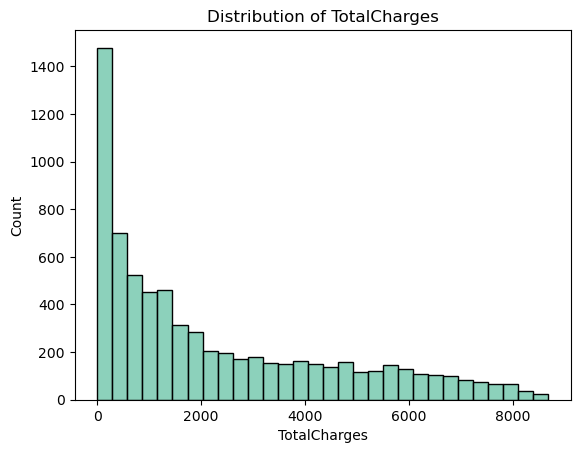

In [65]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numeric_cols:
    sns.histplot(data[col], bins=30,color="#66c2a5")
    plt.title(f'Distribution of {col}')
    plt.show()

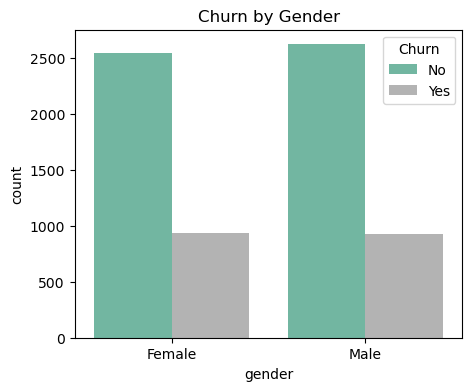

In [28]:
color=["#66c2a5",'#b3b3b3']
plt.figure(figsize=(5,4))
sns.countplot(x='gender',data=data,hue='Churn',palette=color)
plt.title('Churn by Gender')
plt.show()

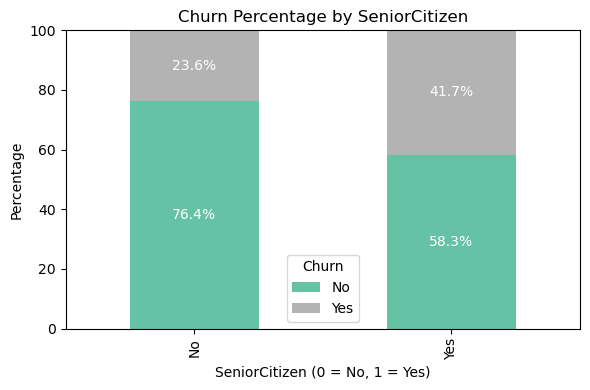

In [29]:
crosstab = pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index') * 100
crosstab.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='Set2')

for i in range(crosstab.shape[0]):
    cumulative = 0
    for j in range(crosstab.shape[1]):
        value = crosstab.iloc[i, j]
        plt.text(i, cumulative + value / 2, f'{value:.1f}%', ha='center', va='center', color='white', fontsize=10)
        cumulative += value

plt.title('Churn Percentage by SeniorCitizen')
plt.xlabel('SeniorCitizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


#### Comparative a greater percentage of people in Senior Citizen category have Churned 

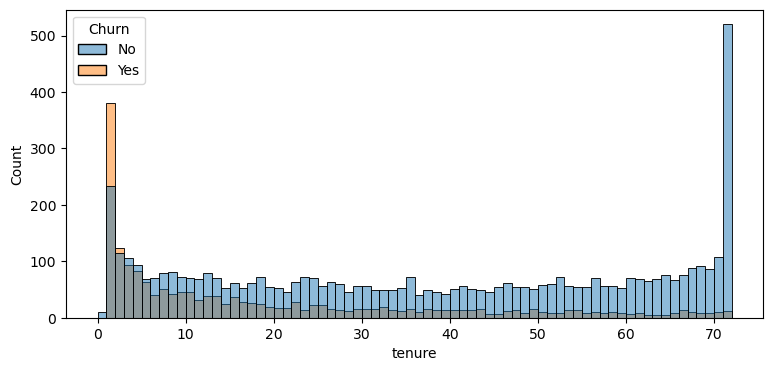

In [31]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure', data=data,hue="Churn",bins=72)
plt.show()

#### People who have used our services for a long time have stayed and people who have used our services 1 or 2 months have churned 

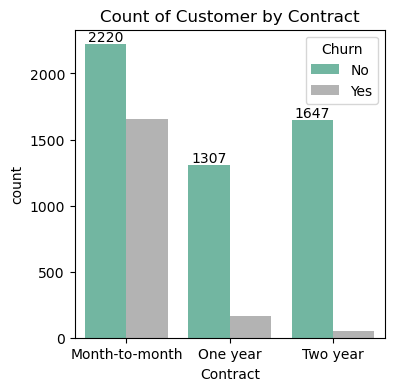

In [33]:
color=["#66c2a5",'#b3b3b3']
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="Contract", data=data,hue="Churn", palette=color)
ax.bar_label(ax.containers[0])  
plt.title("Count of Customer by Contract")
plt.show()

#### People who have month-to-month contract are likely to churn than from those who have 1 or 2 year contract 

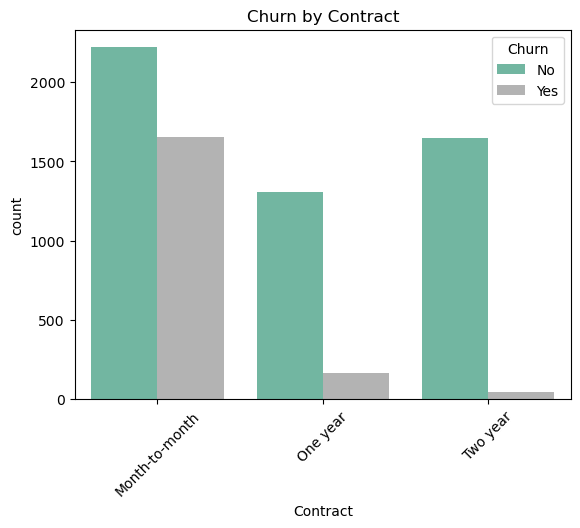

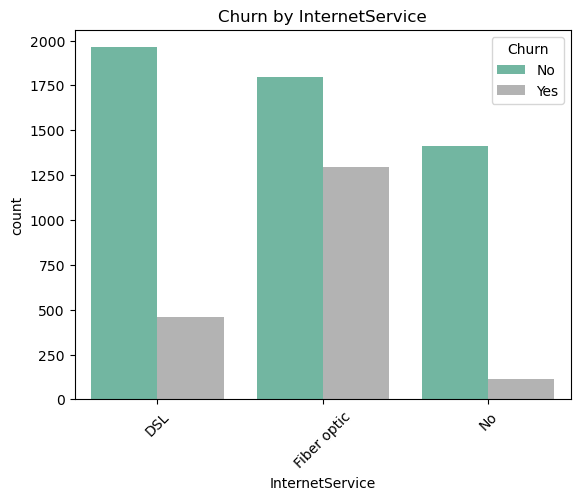

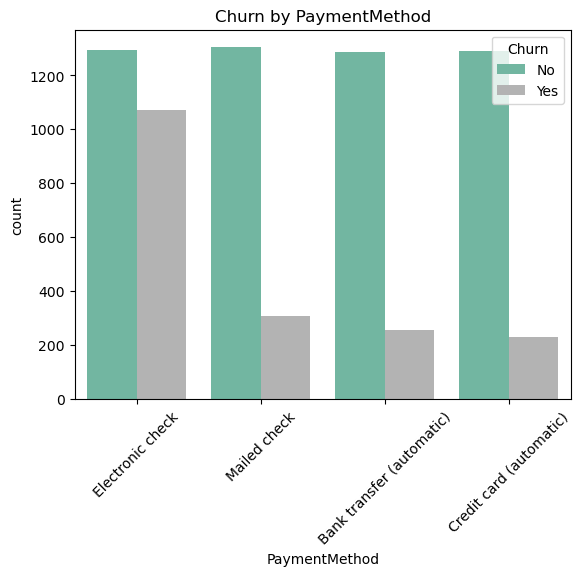

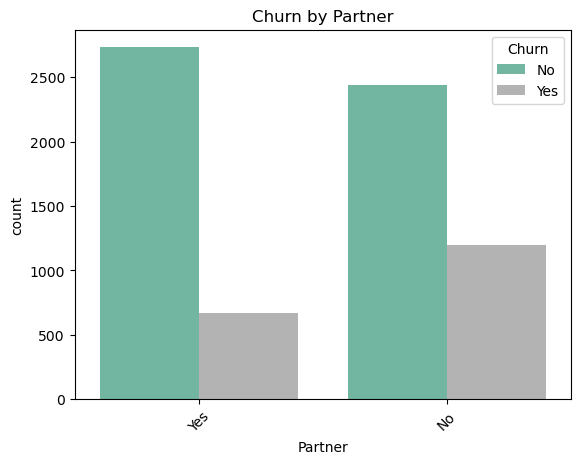

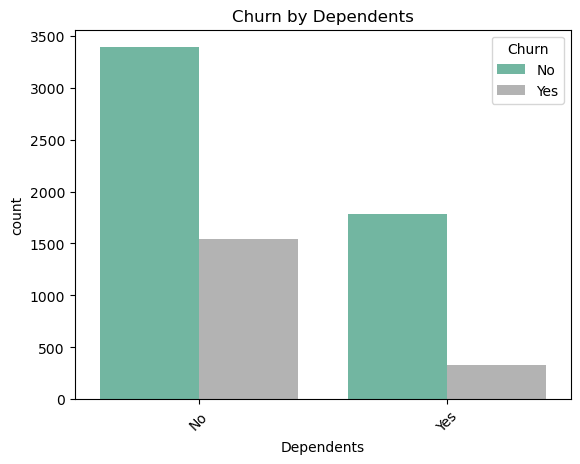

In [86]:
categorical_cols = ['Contract', 'InternetService', 'PaymentMethod', 'Partner', 'Dependents']
colors=["#66c2a5",'#b3b3b3']
for col in categorical_cols:
    sns.countplot(x=col, hue='Churn', data=data,palette=color)
    plt.xticks(rotation=45)
    plt.title(f'Churn by {col}')
    plt.show()


## Outlier Detection

### Boxplots and IQR (Interquartile Range) analysis were used to check for outliers in numeric data .


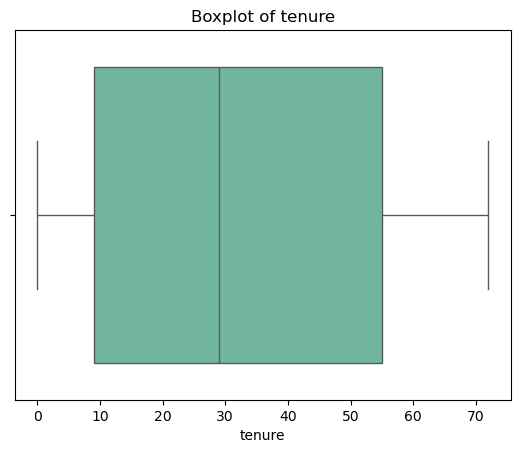

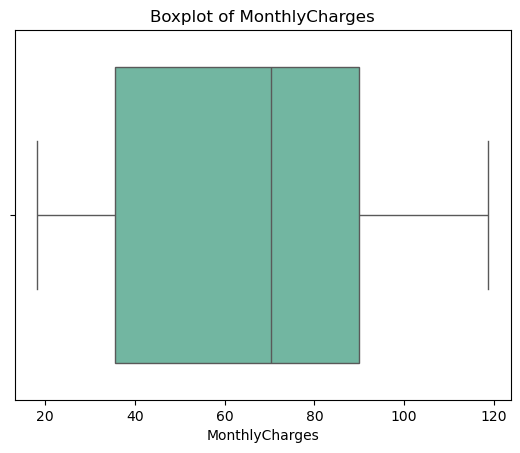

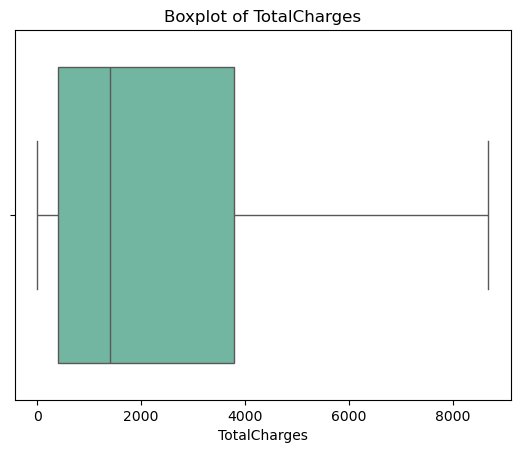

In [36]:
for col in numeric_cols:
    sns.boxplot(x=data[col],color="#66c2a5")
    plt.title(f'Boxplot of {col}')
    plt.show()


In [75]:
def outlier_summary(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    print(f"{column}:")
    print(f"Lower Bound: {lower:.2f}, Upper Bound: {upper:.2f}")
    print(f"Outliers detected: {len(outliers)}\n")
    return outliers

outlier_summary(data, 'MonthlyCharges')
outlier_summary(data, 'TotalCharges')
outlier_summary(data, 'tenure')


MonthlyCharges:
Lower Bound: -46.02, Upper Bound: 171.38
Outliers detected: 0

TotalCharges:
Lower Bound: -4683.52, Upper Bound: 8868.67
Outliers detected: 0

tenure:
Lower Bound: -60.00, Upper Bound: 124.00
Outliers detected: 0



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## Result 

- No outliers were detected using the IQR method (1.5 * IQR rule).
- All values fall within the acceptable range defined by Q1 - 1.5×IQR and Q3 + 1.5×IQR.
- Therefore, no treatment or removal of outliers is necessary for these features

This suggests the dataset is clean and does not suffer from outliers in these numerical columns.


## Correlation Analysis

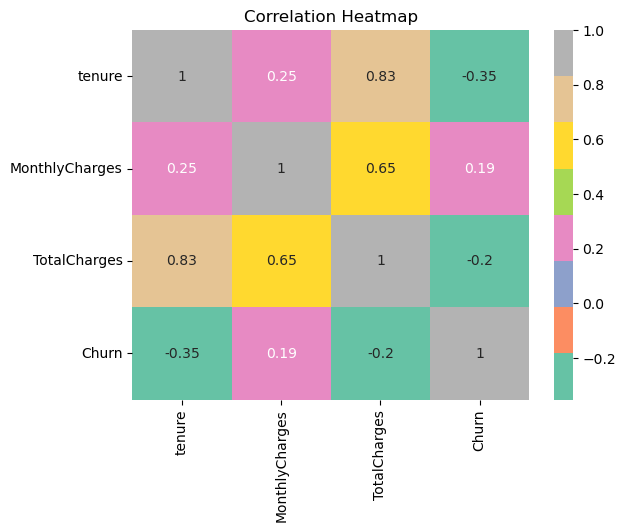

In [92]:
corr_data = data.copy()
corr_data['Churn'] = corr_data['Churn'].map({'Yes': 1, 'No': 0})

sns.heatmap(corr_data[numeric_cols + ['Churn']].corr(), annot=True, cmap='Set2')
plt.title('Correlation Heatmap')
plt.show()


##  Summary & Key Insights

### Key Observations:

- **Churn Rate**: About 26.5% of customers have churned.
- **Contract Type**:
  - Customers on **month-to-month** contracts churn significantly more than those on longer-term contracts.
- **Internet Service**:
  - Customers with **fiber optic** internet are more likely to churn than those with DSL or no internet.
- **Payment Method**:
  - **Electronic check** users show higher churn rates compared to other payment methods.
- **Senior Citizens**:
  - Senior citizens churn at a slightly higher rate than non-seniors.
- **Monthly Charges**:
  - Customers with **higher monthly charges** are more likely to churn.
- **Tenure**:
  - New customers (with low tenure) have a higher churn rate. Long-term customers are more loyal.
